In [ ]:
!nvidia-smi

Sat Aug  1 16:17:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |    221MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!ls 

sample_data  sample_submission.csv  test.csv  train.csv


In [ ]:
!wget -O - https://github.com/GabrielLima1995/Digit-Recognizer/archive/master.tar.gz | tar xz --strip=2 "Digit-Recognizer-master/data"

--2020-08-01 15:59:35--  https://github.com/GabrielLima1995/Digit-Recognizer/archive/master.tar.gz
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/GabrielLima1995/Digit-Recognizer/tar.gz/master [following]
--2020-08-01 15:59:36--  https://codeload.github.com/GabrielLima1995/Digit-Recognizer/tar.gz/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘STDOUT’

-                       [              <=>   ]  14.85M  3.36MB/s    in 4.5s    

2020-08-01 15:59:41 (3.30 MB/s) - written to stdout [15572275]



In [ ]:
!ls

sample_data  sample_submission.csv  test.csv  train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models 
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

In [ ]:
dataframe = pd.read_csv("train.csv",sep=",")

In [ ]:
dataframe.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = dataframe.values
print(type(train))
print(train)
print(train.shape)

<class 'numpy.ndarray'>
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]
(42000, 785)


In [ ]:
y_labels = train[:,0]
print(y_labels)
print(y_labels.shape)

[1 0 1 ... 7 6 9]
(42000,)


In [ ]:
digits_flattened = train[:,1:]
print(digits_flattened)
print(digits_flattened.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(42000, 784)


In [ ]:
digits = digits_flattened.reshape(digits_flattened.shape[0],28,28)
print(digits.shape)

(42000, 28, 28)


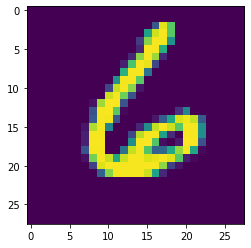

In [ ]:
plt.imshow(digits[-2])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(digits_flattened, y_labels, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(28140, 784)
(28140,)
(13860, 784)
(13860,)


In [ ]:
y_train_encoded = to_categorical(y_train)
y_val_encoded   = to_categorical(y_val)

In [ ]:
print(y_train_encoded.shape)
print(y_val_encoded.shape)

(28140, 10)
(13860, 10)


Rede Densa 

In [ ]:
model = models.Sequential()
model.add(layers.Dense(units=64,activation='relu',input_shape=(784,), kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=64,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mom = optimizers.SGD(lr = 0.001,decay=0,momentum=0.9,nesterov=True)
model.compile(optimizer=mom,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train_encoded,batch_size=120,epochs=600,verbose=1,validation_data=(X_val,y_val_encoded))

Epoch 1/600
235/235 [==============================] - 1s 5ms/step - loss: 4.3906 - accuracy: 0.6260 - val_loss: 2.7632 - val_accuracy: 0.7561
Epoch 2/600
235/235 [==============================] - 1s 4ms/step - loss: 2.5317 - accuracy: 0.7915 - val_loss: 2.3794 - val_accuracy: 0.8092
Epoch 3/600
235/235 [==============================] - 1s 4ms/step - loss: 2.1776 - accuracy: 0.8408 - val_loss: 2.0720 - val_accuracy: 0.8596
Epoch 4/600
235/235 [==============================] - 1s 4ms/step - loss: 1.9154 - accuracy: 0.8824 - val_loss: 1.8668 - val_accuracy: 0.8826
Epoch 5/600
235/235 [==============================] - 1s 4ms/step - loss: 1.7147 - accuracy: 0.9009 - val_loss: 1.6778 - val_accuracy: 0.8973
Epoch 6/600
235/235 [==============================] - 1s 4ms/step - loss: 1.5525 - accuracy: 0.9106 - val_loss: 1.5129 - val_accuracy: 0.9049
Epoch 7/600
235/235 [==============================] - 1s 4ms/step - loss: 1.4109 - accuracy: 0.9186 - val_loss: 1.3936 - val_accuracy: 0.9138

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_loss = history_dict['loss']
val_loss   = history_dict['val_loss']

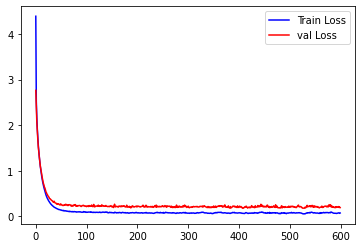

In [ ]:
plt.plot(train_loss,'b',label="Train Loss")
plt.plot(val_loss,'r',label="val Loss")
plt.legend()
plt.show()

In [ ]:
train_acc = history_dict['accuracy']
val_acc   = history_dict['val_accuracy']

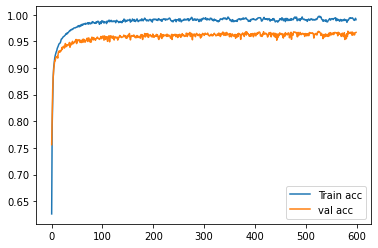

In [ ]:
plt.plot(train_acc,label="Train acc")
plt.plot(val_acc,label="val acc")
plt.legend()
plt.show()

In [ ]:
dataframe_test = pd.read_csv("test.csv",sep=",")

In [ ]:
test_flattened = dataframe_test.values

In [ ]:
print(type(test_flattened))
print(test_flattened)
print(test_flattened.shape)

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(28000, 784)


In [ ]:
results = model.predict(test_flattened)

In [ ]:
print(results)
print(results.shape)

[[2.4914970e-15 7.5866396e-10 1.0000000e+00 ... 1.0968566e-09
  2.7614981e-12 3.8491216e-19]
 [9.9999952e-01 7.9291634e-17 1.2457583e-09 ... 1.6886915e-11
  6.7216490e-16 2.0980913e-10]
 [6.2510514e-07 6.1008734e-07 5.3645899e-06 ... 7.5241609e-05
  5.7109988e-05 9.9716032e-01]
 ...
 [4.1590085e-17 1.2646718e-17 3.7030474e-12 ... 1.6851625e-15
  1.8437936e-09 8.3737173e-10]
 [5.3173427e-10 1.3070137e-10 2.3087289e-07 ... 2.6696851e-04
  8.2269754e-11 9.9384898e-01]
 [1.0699252e-15 5.5249194e-11 1.0000000e+00 ... 7.4436507e-13
  7.0579187e-13 1.7978553e-21]]
(28000, 10)


In [ ]:
y_results = results.argmax(axis=1)

In [ ]:
print(y_results)
print(y_results.shape)

[2 0 9 ... 3 9 2]
(28000,)


In [52]:
p = np.array(list(range(1,len(y_results)+1)))

(28000,)


In [61]:
submition = pd.DataFrame({'ImageId':p,'Label':y_results})
submition.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [63]:
submition.to_csv('submition.csv',sep=',',index=False)

In [64]:
!ls

sample_data  sample_submission.csv  submition.csv  test.csv  train.csv
